In [4]:
import pandas as pd

base = pd.read_csv('./emp_automovel.csv')
base.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [5]:
x = base.drop("inadimplente", axis=1)
y = base.inadimplente

In [6]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(x, y, stratify=y, test_size=0.15, random_state=5)
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y)


In [8]:
from sklearn.tree import DecisionTreeClassifier

new_tree = DecisionTreeClassifier(max_depth=10)

new_tree.fit(x_train, y_train)

print(f"score of the tree: {new_tree.score(x_train, y_train)}")
print(f"score of the tree_val: {new_tree.score(x_val, y_val)}")

score of the tree: 0.9203542392566783
score of the tree_val: 0.9071509450396307


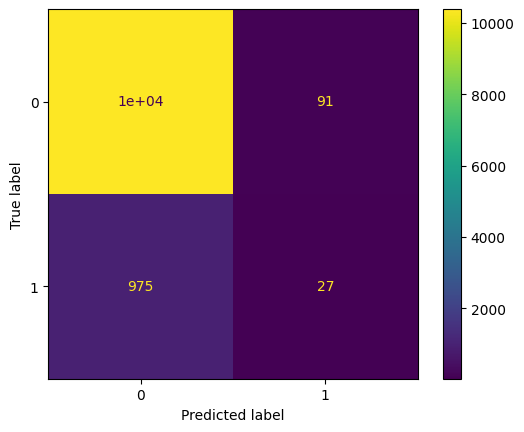

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_prev = new_tree.predict(x_val)

matrix = confusion_matrix(y_val, y_prev)
matrix_vis = ConfusionMatrixDisplay(matrix)

matrix_vis.plot()

In [10]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)
rfc_score = rfc.score(x_val, y_val)
rfc_y_prev = rfc.predict(x_val)
print(f"score of the rfc: {rfc_score}")

score of the rfc: 0.916035188572424


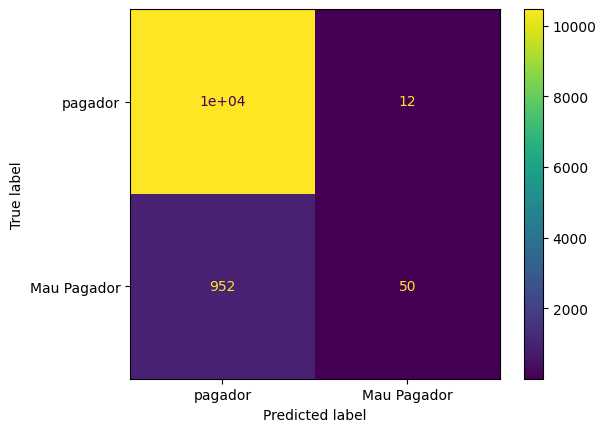

In [11]:

rfc_vis = ConfusionMatrixDisplay(confusion_matrix(y_val, rfc_y_prev), display_labels=["pagador", "Mau Pagador"])
rfc_vis.plot();

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(f'accuracy for rfc is {accuracy_score(y_val, rfc_y_prev)}')
print(f'precision for rfc is {precision_score(y_val, rfc_y_prev)}')
print(f'recall for rfc is {recall_score(y_val, rfc_y_prev)}')
print(f'f1-score for rfc is {f1_score(y_val, rfc_y_prev)}')

accuracy for rfc is 0.916035188572424
